In [1]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [2]:
import gseapy

In [3]:
 names = gseapy.get_library_name(organism='Mouse')

 # show top 20 entries.
 print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

In [4]:
# gene_df = pd.read_csv('./Analysis-Blebbistatin/annotated_deg_pos_FC1.csv')

In [29]:
name = 'Blebb All Filtered'

gene_df = pd.DataFrame(pd.read_csv('EnrichmentClean.csv')[name].dropna())

In [30]:
gene_df

,Blebb All Filtered
0,Atcay
2,Tuba8
3,Mt1a
4,G1p2
5,Osgin1
...,...
973,Htr1f
974,Chrnb2
975,Ggta1
976,Col5a1


In [31]:
glist = gene_df[name].squeeze().str.strip().to_list()

In [32]:
enr = gp.enrichr(gene_list=glist, # or "./tests/data/gene_list.txt",
                 gene_sets=['WikiPathways_2019_Mouse','Mouse_Gene_Atlas', 'KEGG_2019_Mouse', 'GO_Molecular_Function_2021', 'GO_Biological_Process_2021', 'GO_Cellular_Component_2021'],
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [33]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,WikiPathways_2019_Mouse,Keap1-Nrf2 WP1245,4/14,0.000604,0.074914,0,0,13.172835,97.632964,MAF;GSTA2;HMOX1;GCLM
1,WikiPathways_2019_Mouse,Adipogenesis genes WP447,10/134,0.006654,0.243065,0,0,2.667377,13.370401,GDF10;TLE3;NCOA2;SP1;DDIT3;NDN;TRIB3;PPARA;KLF...
2,WikiPathways_2019_Mouse,Regulation of Cardiac Hypertrophy by miR-208 W...,2/6,0.012162,0.243065,0,0,16.415398,72.383357,HOPX;MYH7
3,WikiPathways_2019_Mouse,Calcium Regulation in the Cardiac Cell WP553,10/147,0.012361,0.243065,0,0,2.412640,10.599195,CACNB1;RGS3;GRK5;KCNB1;GJA4;GRK6;GNG8;CALR;PKI...
4,WikiPathways_2019_Mouse,White fat cell differentiation WP2872,4/32,0.014245,0.243065,0,0,4.700218,19.982245,TLE3;DDIT3;KLF15;KLF2


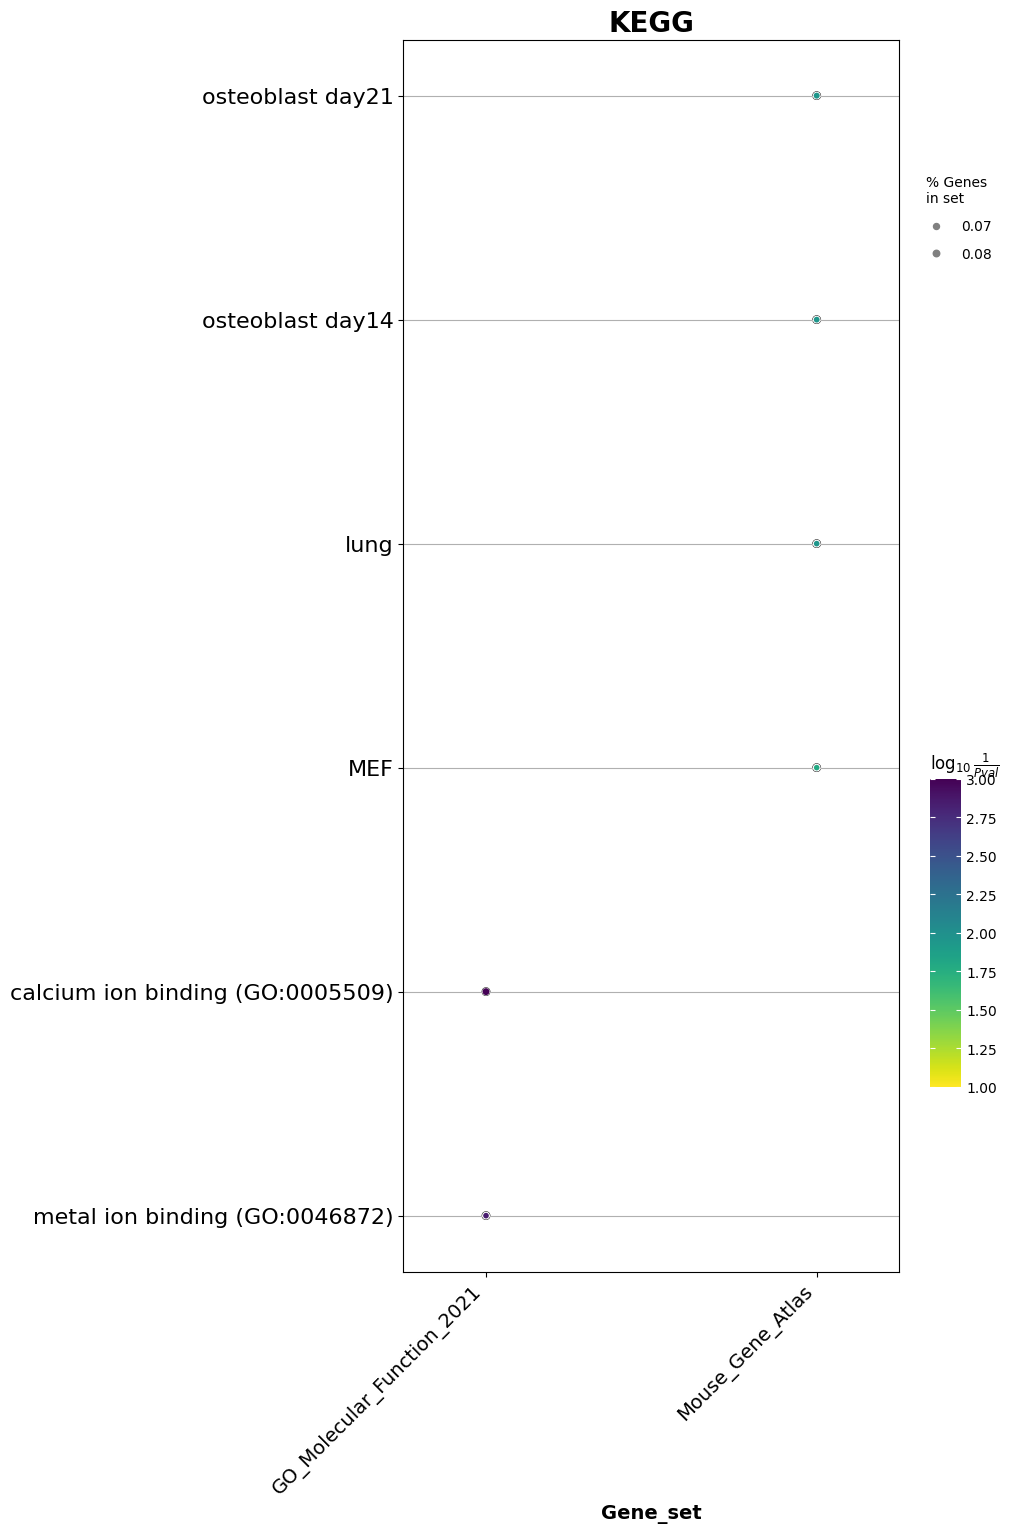

In [34]:
from gseapy import barplot, dotplot

# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(8,16),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )